### 匯入所需模組

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

### 讀取 mnist 資料

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 將 features (數字影像特徵值) 轉換為 4 維矩陣

In [5]:
x_train_4D = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test_4D = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

### 將 features(數字影像特徵值)標準化
將features(數字影像特徵值)標準化，可以提高模型預測的準確度，並且更快收斂。

In [6]:
x_train_4D_normalize = x_train_4D / 255
x_test_4D_normalize = x_test_4D / 255

### label (數字的真實值) 以 Onehot encoding 轉換
使用 np_utils.to_categorical，將訓練資料與測試資料的label，進行Onehot encoding轉換。

In [7]:
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

# 建立模型

### 匯入建立模型所需的 package

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [10]:
model = Sequential()

In [12]:
model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same', input_shape=(28, 28, 1), activation='relu'))

### 建立池化層 1

In [14]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
model.add(Conv2D(filters=36, kernel_size=(5, 5), padding='same', activation='relu'))

In [18]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [19]:
model.add(Dropout(0.25))

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(128, activation='relu'))

In [22]:
model.add(Dropout(0.5))

In [23]:
model.add(Dense(10, activation='softmax'))

In [24]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
train_history = model.fit(x=x_train_4D_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=300, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 36s - loss: 0.4860 - acc: 0.8478 - val_loss: 0.0966 - val_acc: 0.9728
Epoch 2/10
 - 34s - loss: 0.1411 - acc: 0.9584 - val_loss: 0.0638 - val_acc: 0.9810
Epoch 3/10
 - 34s - loss: 0.1020 - acc: 0.9694 - val_loss: 0.0508 - val_acc: 0.9842
Epoch 4/10
 - 34s - loss: 0.0838 - acc: 0.9751 - val_loss: 0.0451 - val_acc: 0.9868
Epoch 5/10
 - 35s - loss: 0.0713 - acc: 0.9784 - val_loss: 0.0396 - val_acc: 0.9876
Epoch 6/10
 - 36s - loss: 0.0640 - acc: 0.9809 - val_loss: 0.0386 - val_acc: 0.9884
Epoch 7/10
 - 35s - loss: 0.0560 - acc: 0.9833 - val_loss: 0.0407 - val_acc: 0.9881
Epoch 8/10
 - 35s - loss: 0.0502 - acc: 0.9847 - val_loss: 0.0330 - val_acc: 0.9905
Epoch 9/10
 - 35s - loss: 0.0447 - acc: 0.9870 - val_loss: 0.0330 - val_acc: 0.9903
Epoch 10/10
 - 35s - loss: 0.0431 - acc: 0.9867 - val_loss: 0.0337 - val_acc: 0.9903


In [31]:
import matplotlib.pyplot as plt

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

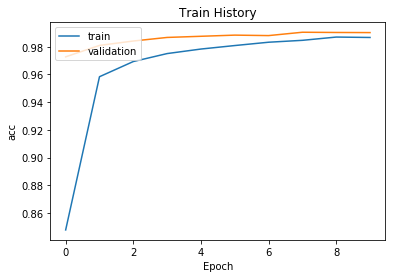

In [32]:
show_train_history(train_history, 'acc', 'val_acc')

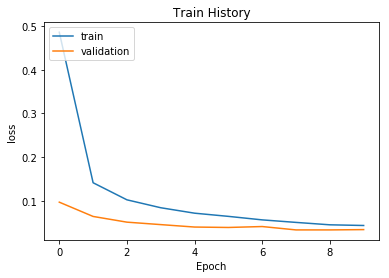

In [33]:
show_train_history(train_history, 'loss', 'val_loss')

In [34]:
scores = model.evaluate(x_test_4D_normalize, y_test_onehot)

10000/10000 [==============================] - 3s 293us/step


In [35]:
scores[1]

0.99119999999999997

In [36]:
prediction = model.predict_classes(x_test_4D_normalize)

In [37]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [38]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = 'label=' + str(labels[idx])
        if len(prediction) > 0:
            title += ',predict=' + str(prediction[idx])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()
        

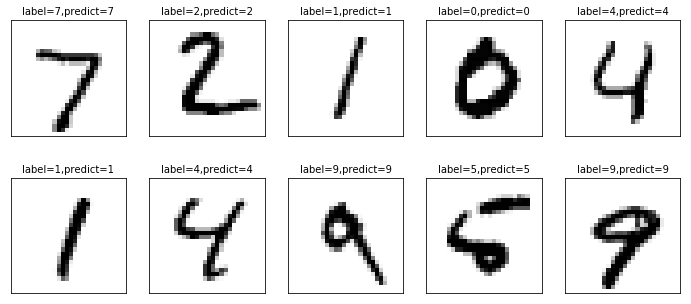

In [39]:
plot_images_labels_prediction(x_test, y_test, prediction, idx=0)

In [40]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [41]:
import pandas as pd

pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,2,1,0,0
1,0,1131,1,0,0,1,0,1,1,0
2,2,1,1025,0,1,0,0,3,0,0
3,0,0,0,1006,0,0,0,2,2,0
4,0,0,0,0,976,0,1,0,1,4
5,1,0,0,8,0,879,2,1,0,1
6,4,2,0,1,1,1,949,0,0,0
7,0,2,3,2,0,0,0,1018,1,2
8,2,1,3,2,1,1,0,2,959,3
